# Natural Language Processing Project

The project aims to classify Yelp Reviews into 1 - 5 star categories based off the text content in the reviews. 

Dataset: https://www.kaggle.com/c/yelp-recsys-2013.

Each observation in this dataset is a review of a particular business by a particular user.

The "stars" column is the number of stars (1 through 5) assigned by the reviewer to the business. 

The "cool", "useful" and "funny" columns are ratings of how "cool", "useful" and "funny" the review's are, and are not a rating of the business itself. 

## Imports


In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import nltk # Imports the library
import string
import matplotlib.pyplot as plt
nltk.download('stopwords') #Download the necessary datasets

[nltk_data] Error loading stopwords: <urlopen error [Errno 8] nodename
[nltk_data]     nor servname provided, or not known>


False

## The Data

In [2]:
yelp = pd.read_csv("yelp.csv")
yelp = yelp.drop(columns=["business_id","review_id","user_id","type"])


In [3]:
yelp.head()

,date,stars,text,cool,useful,funny
0,2011-01-26,5,My wife took me here on my birthday for breakf...,2,5,0
1,2011-07-27,5,I have no idea why some people give bad review...,0,0,0
2,2012-06-14,4,love the gyro plate. Rice is so good and I als...,0,1,0
3,2010-05-27,5,"Rosie, Dakota, and I LOVE Chaparral Dog Park!!...",1,2,0
4,2012-01-05,5,General Manager Scott Petello is a good egg!!!...,0,0,0


In [4]:
yelp.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 6 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   date    10000 non-null  object
 1   stars   10000 non-null  int64 
 2   text    10000 non-null  object
 3   cool    10000 non-null  int64 
 4   useful  10000 non-null  int64 
 5   funny   10000 non-null  int64 
dtypes: int64(4), object(2)
memory usage: 468.9+ KB


In [5]:
yelp.describe()

,stars,cool,useful,funny
count,10000.000000,10000.000000,10000.000000,10000.000000
mean,3.777500,0.876800,1.409300,0.701300
std,1.214636,2.067861,2.336647,1.907942
min,1.000000,0.000000,0.000000,0.000000
25%,3.000000,0.000000,0.000000,0.000000
50%,4.000000,0.000000,1.000000,0.000000
75%,5.000000,1.000000,2.000000,1.000000
max,5.000000,77.000000,76.000000,57.000000


**Creating a new column called "text length" which is the number of words in the text column.**

In [6]:
def text_count(mess):
    """
    Takes in a string of text, then performs the following:
    1. Remove all punctuation
    3. Returns a length of words of the cleaned text
    """
    # Check characters to see if they are in punctuation
    nopunc = [char for char in mess if char not in string.punctuation]

    # Join the characters again to form the string.
    nopunc = ''.join(nopunc)
    
    # Now just remove any stopwords
    return len([word for word in nopunc.split()])

In [7]:
yelp["text length"] = yelp['text'].apply(text_count)
yelp.head()

,date,stars,text,cool,useful,funny,text length
0,2011-01-26,5,My wife took me here on my birthday for breakf...,2,5,0,155
1,2011-07-27,5,I have no idea why some people give bad review...,0,0,0,257
2,2012-06-14,4,love the gyro plate. Rice is so good and I als...,0,1,0,15
3,2010-05-27,5,"Rosie, Dakota, and I LOVE Chaparral Dog Park!!...",1,2,0,76
4,2012-01-05,5,General Manager Scott Petello is a good egg!!!...,0,0,0,84


# EDA

**Using FacetGrid from the seaborn library to create a grid of 5 histograms of text length based off of the star ratings.**

/Users/danielvisser/anaconda3/envs/npl_project/lib/python3.11/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/Users/danielvisser/anaconda3/envs/npl_project/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/Users/danielvisser/anaconda3/envs/npl_project/lib/python3.11/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/Users/danielvisser/anaconda3/envs/npl_project/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_in

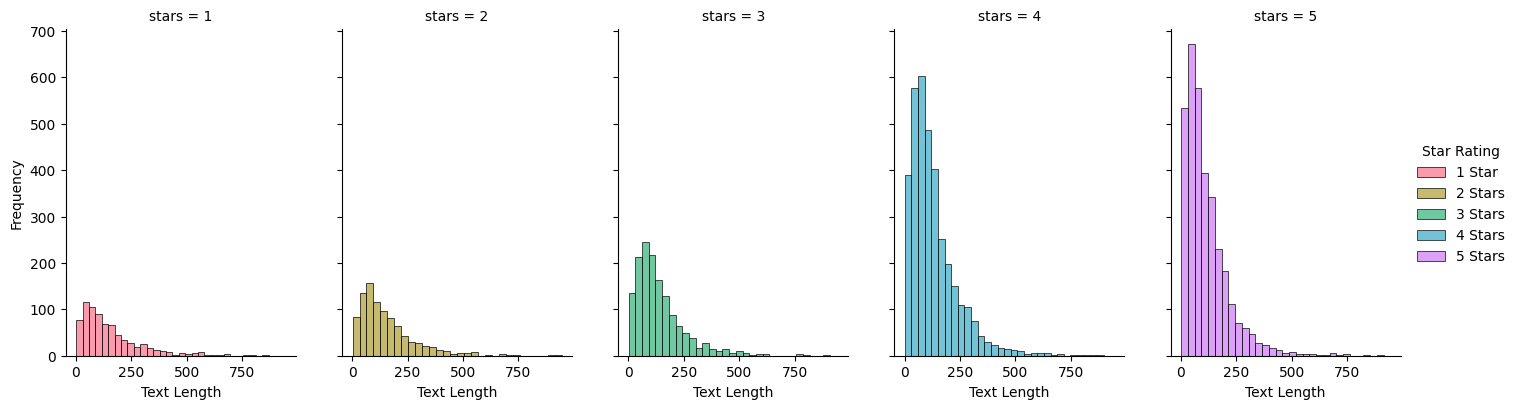

In [8]:
# Create a FacetGrid with Seaborn
g = sns.FacetGrid(yelp, col='stars', col_order=[1, 2, 3, 4, 5], height=4, aspect=0.7)

# Map a histogram onto the grid, specifying different colors
for i, ax in enumerate(g.axes.flat):
    color = sns.color_palette("husl", n_colors=5)[i]  # Choose a color for each histogram
    sns.histplot(yelp[yelp['stars'] == (i + 1)]['text length'], bins=30, color=color, ax=ax, alpha=0.7)

# Set axis labels and a title
g.set_axis_labels('Text Length', 'Frequency')

# Create a legend
legend_labels = ['1 Star', '2 Stars', '3 Stars', '4 Stars', '5 Stars']
g.add_legend(title='Star Rating', labels=legend_labels)

# Show the plot
plt.show()


**Creating a boxplot of text length for each star category.**

/Users/danielvisser/anaconda3/envs/npl_project/lib/python3.11/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/Users/danielvisser/anaconda3/envs/npl_project/lib/python3.11/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/Users/danielvisser/anaconda3/envs/npl_project/lib/python3.11/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):


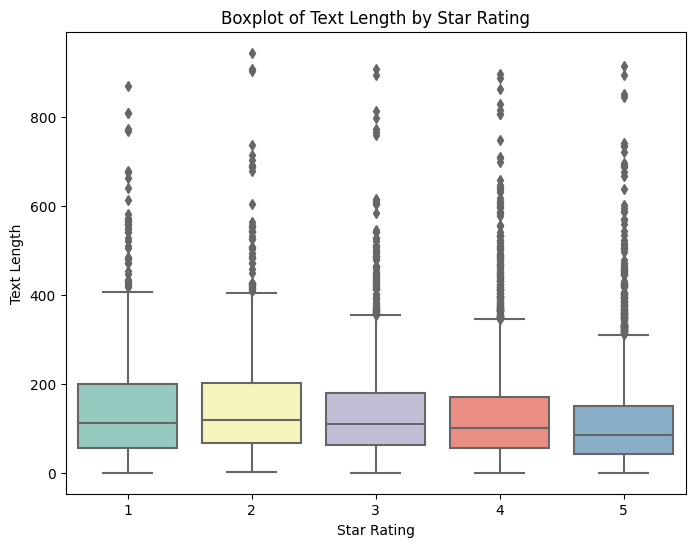

In [9]:
plt.figure(figsize=(8, 6))  # Optional: Adjust the figure size

sns.boxplot(x='stars', y='text length', data=yelp, palette='Set3')  # You can choose a different palette if desired

# Set axis labels and a title
plt.xlabel('Star Rating')
plt.ylabel('Text Length')
plt.title('Boxplot of Text Length by Star Rating')

# Show the plot
plt.show()

**Creating a countplot of the number of occurrences for each type of star rating.**

/Users/danielvisser/anaconda3/envs/npl_project/lib/python3.11/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/Users/danielvisser/anaconda3/envs/npl_project/lib/python3.11/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/Users/danielvisser/anaconda3/envs/npl_project/lib/python3.11/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):


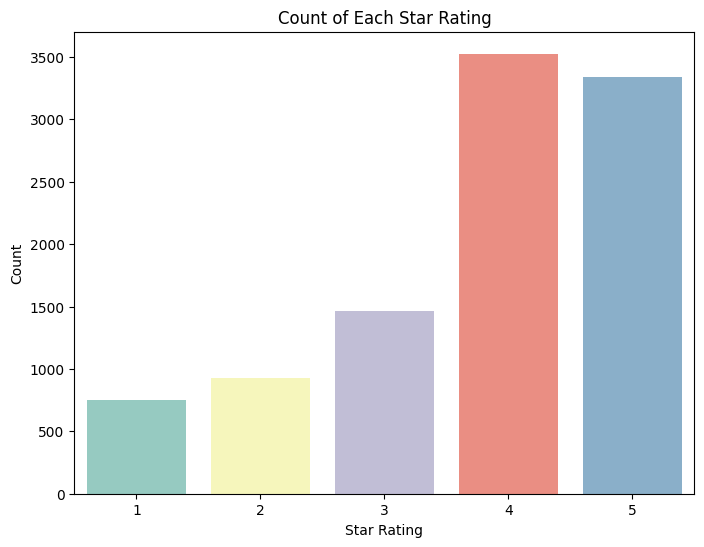

In [10]:
plt.figure(figsize=(8, 6))  # Optional: Adjust the figure size

sns.countplot(x='stars', data=yelp, palette='Set3')  # You can choose a different palette if desired

# Set axis labels and a title
plt.xlabel('Star Rating')
plt.ylabel('Count')
plt.title('Count of Each Star Rating')

# Show the plot
plt.show()

** Using groupby to get the mean values of the numerical columns.**

In [11]:
numeric_df = yelp.select_dtypes(include='number')
stars = numeric_df.groupby('stars').mean()
stars

,cool,useful,funny,text length
stars,,,,
1,0.576769,1.604806,1.056075,153.405874
2,0.719525,1.563107,0.875944,155.764833
3,0.788501,1.306639,0.694730,140.041752
4,0.954623,1.395916,0.670448,130.496597
5,0.944261,1.381780,0.608631,113.880132


**Using the corr() method on that groupby dataframe to produce this dataframe:**

In [12]:
stars.corr()

,cool,useful,funny,text length
cool,1.000000,-0.743329,-0.944939,-0.866983
useful,-0.743329,1.000000,0.894506,0.699246
funny,-0.944939,0.894506,1.000000,0.848990
text length,-0.866983,0.699246,0.848990,1.000000


**Then using seaborn to create a heatmap based off that .corr() dataframe:**

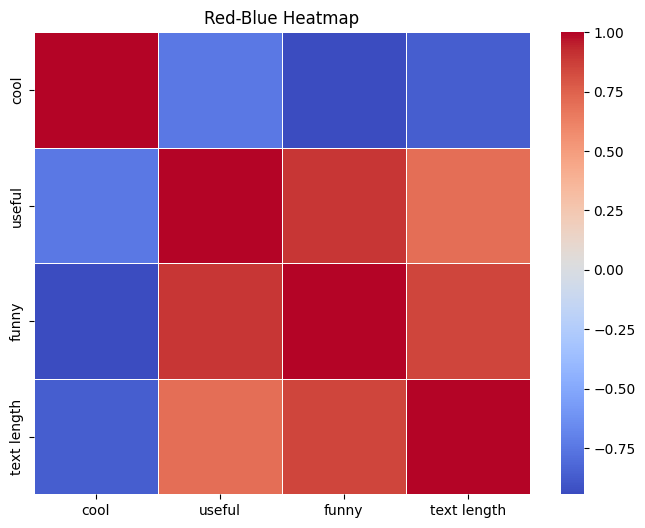

In [13]:
plt.figure(figsize=(8, 6))  # Optional: Adjust the figure size

sns.heatmap(stars.corr(), cmap='coolwarm', annot=False, fmt='.1f', linewidths=0.5)

plt.title('Red-Blue Heatmap')

# Show the heatmap
plt.show()

## NLP Classification Task


In [14]:
yelp.head()

,date,stars,text,cool,useful,funny,text length
0,2011-01-26,5,My wife took me here on my birthday for breakf...,2,5,0,155
1,2011-07-27,5,I have no idea why some people give bad review...,0,0,0,257
2,2012-06-14,4,love the gyro plate. Rice is so good and I als...,0,1,0,15
3,2010-05-27,5,"Rosie, Dakota, and I LOVE Chaparral Dog Park!!...",1,2,0,76
4,2012-01-05,5,General Manager Scott Petello is a good egg!!!...,0,0,0,84


**Creating two objects X and y. X will be the 'text' column of yelp_class and y will be the 'stars' column of yelp_class**

In [15]:
X, y, = yelp["text"], yelp["stars"]


**Importing CountVectorizer and creating a CountVectorizer object.**

In [16]:
from sklearn.feature_extraction.text import CountVectorizer
cv = CountVectorizer()

** Using the fit_transform method on the CountVectorizer object and passing in X (the 'text' column) and overwriting X.**

In [17]:
X = cv.fit_transform(X)

## Train Test Split

Splitting the data into training and testing data.


In [18]:
from sklearn.model_selection import train_test_split

In [19]:
x_train, x_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=101)

## Training the Model


In [20]:
from sklearn.naive_bayes import MultinomialNB
nb = MultinomialNB()

**Fitting nb using the training data.**

In [21]:
nb.fit(x_train, y_train)

MultinomialNB()

## Predictions and Evaluations

Time to see how our model did

In [22]:
predictions = nb.predict(x_test)

Using confusion matrix and classification report using these predictions and y_test 

In [23]:
from sklearn.metrics import confusion_matrix,classification_report

In [24]:
print(confusion_matrix(y_test,predictions))
print('\n')
print(classification_report(y_test,predictions))

[[ 57  35  12  79  37]
 [ 12  20  33 180  28]
 [  6   8  36 350  43]
 [  6   4  21 775 258]
 [  5   5   9 446 535]]


              precision    recall  f1-score   support

           1       0.66      0.26      0.37       220
           2       0.28      0.07      0.12       273
           3       0.32      0.08      0.13       443
           4       0.42      0.73      0.54      1064
           5       0.59      0.54      0.56      1000

    accuracy                           0.47      3000
   macro avg       0.46      0.34      0.34      3000
weighted avg       0.47      0.47      0.43      3000



**Now I will try to include TF-IDF to this process using a pipeline.**

# Using Text Processing

** Importing TfidfTransformer from sklearn. **

In [25]:
from sklearn.feature_extraction.text import  TfidfTransformer
from sklearn.pipeline import Pipeline

** Ccreating a pipeline with the following steps:CountVectorizer(), TfidfTransformer(),MultinomialNB()**

In [26]:
pipeline = Pipeline([
    ('bow', CountVectorizer()),  # strings to token integer counts
    ('classifier', MultinomialNB()),  # train on TF-IDF vectors w/ Naive Bayes classifier
])

## Using the Pipeline


### Train Test Split


In [27]:
X, y, = yelp["text"], yelp["stars"]
x_train, x_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=101)

**Now fit the pipeline to the training datas**

In [28]:
pipeline.fit(x_train, y_train)

Pipeline(steps=[('bow', CountVectorizer()), ('classifier', MultinomialNB())])

### Predictions and Evaluation

In [29]:
predictions = pipeline.predict(x_test)

In [30]:
print(confusion_matrix(y_test, predictions))
print("/")
print(classification_report(y_test, predictions))

[[ 70  31  13  71  35]
 [ 16  22  39 165  31]
 [  5  10  41 345  42]
 [  7   3  25 766 263]
 [  6   3   6 438 547]]
/
              precision    recall  f1-score   support

           1       0.67      0.32      0.43       220
           2       0.32      0.08      0.13       273
           3       0.33      0.09      0.14       443
           4       0.43      0.72      0.54      1064
           5       0.60      0.55      0.57      1000

    accuracy                           0.48      3000
   macro avg       0.47      0.35      0.36      3000
weighted avg       0.48      0.48      0.45      3000



Looks like Tf-Idf actually made things worse! 